# Import Necessary Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns


sns.set(style="whitegrid")


# Load and Explore the Dataset

# Data Preprocessing 

In [14]:
# Load the data
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

# Display the first few rows of the training data
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Visualization

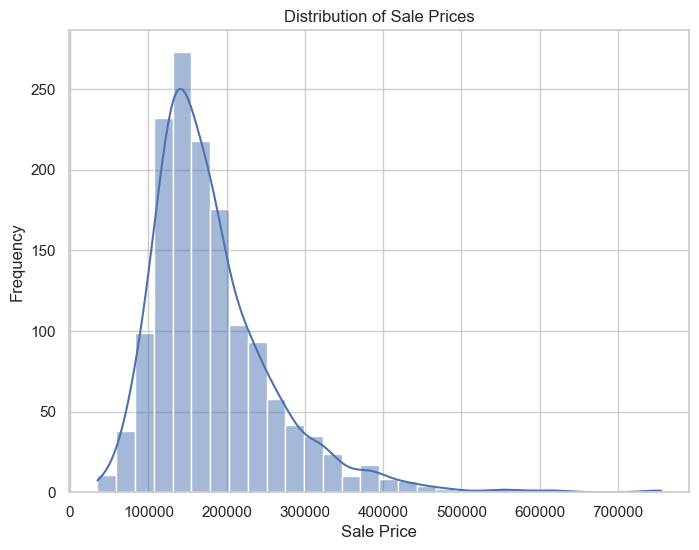

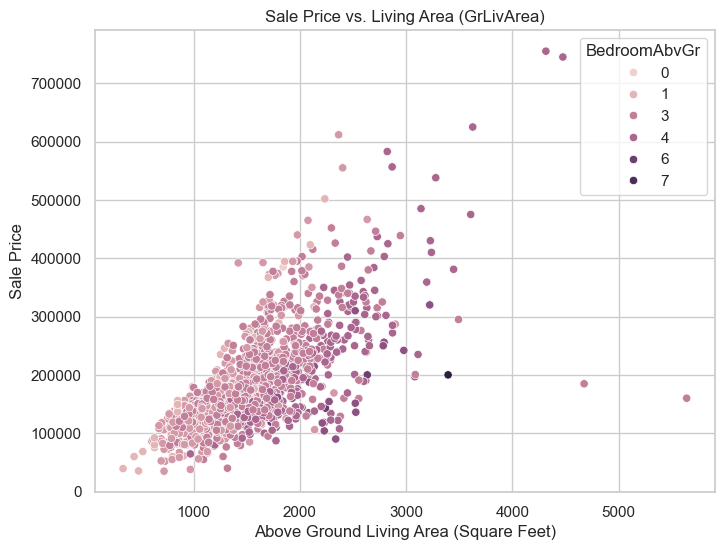

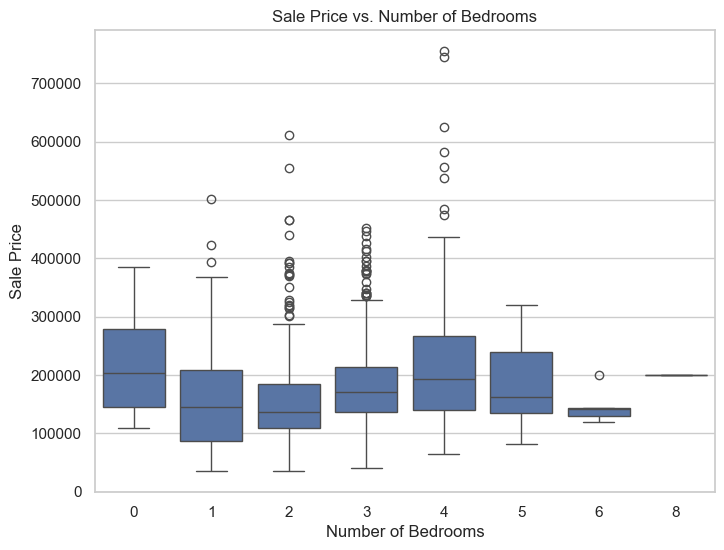

In [16]:
# Visualizing the distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Visualizing the relationship between GrLivArea (square footage) and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], hue=train_data['BedroomAbvGr'])
plt.title('Sale Price vs. Living Area (GrLivArea)')
plt.xlabel('Above Ground Living Area (Square Feet)')
plt.ylabel('Sale Price')
plt.show()

# Visualizing the number of bedrooms vs. sale price
plt.figure(figsize=(8, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=train_data)
plt.title('Sale Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.show()


# Feature Selection and Preprocessing

In [19]:
# Selecting features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
X = train_data[features].copy()  # Create a copy to avoid SettingWithCopyWarning

# Creating total bathroom feature (FullBath + HalfBath)
X['TotalBath'] = X['FullBath'] + 0.5 * X['HalfBath']

# Dropping the individual bathroom columns
X = X.drop(['FullBath', 'HalfBath'], axis=1)

# Target variable
y = train_data['SalePrice']

# Handling missing values 
X = X.dropna()

# Display 
X.head()


,GrLivArea,BedroomAbvGr,TotalBath
0,1710,3,2.5
1,1262,3,2.0
2,1786,3,2.5
3,1717,3,1.0
4,2198,4,2.5


# Train-Test Split

In [20]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and validation sets
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")


Training set: (1168, 3), Validation set: (292, 3)


# Model Training

In [21]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [   100.63689525 -26645.53251638  27083.20771296]
Model Intercept: 56862.57751607975


# Model Evaluation

Mean Absolute Error: 36569.644427873995
Root Mean Squared Error: 53371.56024906055


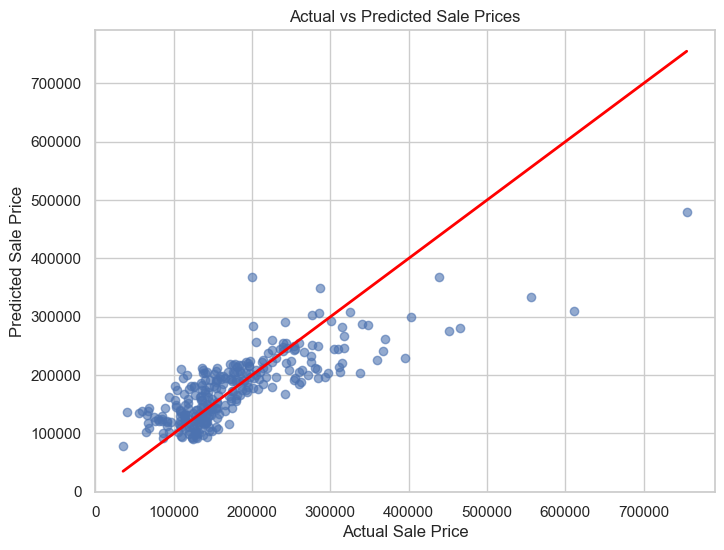

In [24]:
import numpy as np

# Calculate RMSE using numpy
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Visualizing the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', lw=2)
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()


# Predicting on the Test Dataset

In [26]:
# Preprocessing the test data
X_test = test_data[features].copy()  # Create a copy to avoid SettingWithCopyWarning
X_test['TotalBath'] = X_test['FullBath'] + 0.5 * X_test['HalfBath']

# Dropping the individual bathroom columns
X_test = X_test.drop(['FullBath', 'HalfBath'], axis=1)

# Handling missing values in test set
X_test = X_test.dropna()

# Making predictions
test_predictions = model.predict(X_test)

# Creating a submission file
submission = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission.to_csv('sample_submission.csv', index=False)

print("Submission file created successfully.")


Submission file created successfully.


# Visualizing Test Predictions

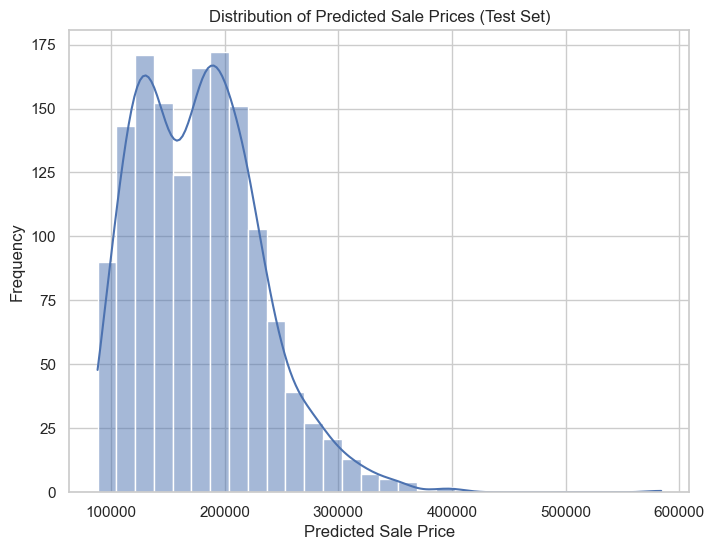

In [27]:
# Visualizing the predicted sale prices on the test set
plt.figure(figsize=(8, 6))
sns.histplot(test_predictions, kde=True, bins=30)
plt.title('Distribution of Predicted Sale Prices (Test Set)')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Frequency')
plt.show()


In [31]:
import pandas as pd
import numpy as np

# Define a function to predict house prices based on user inputs
def predict_house_price(gr_liv_area, bedroom, full_bath, half_bath):
    # Create a DataFrame for the user input
    input_data = pd.DataFrame({
        'GrLivArea': [gr_liv_area],
        'BedroomAbvGr': [bedroom],
        'FullBath': [full_bath],
        'HalfBath': [half_bath]
    })
    
    # Create the TotalBath feature
    input_data['TotalBath'] = input_data['FullBath'] + 0.5 * input_data['HalfBath']
    
    # Drop the individual bathroom columns
    input_data = input_data.drop(['FullBath', 'HalfBath'], axis=1)
    
    # Predict using the trained model
    prediction = model.predict(input_data)
    
    return prediction[0]

# Example user inputs
gr_liv_area = float(input("Enter the above ground living area (square feet): "))
bedroom = int(input("Enter the number of bedrooms above ground level: "))
full_bath = int(input("Enter the number of full bathrooms above ground level: "))
half_bath = int(input("Enter the number of half bathrooms above ground level: "))

# Get the predicted price
predicted_price = predict_house_price(gr_liv_area, bedroom, full_bath, half_bath)

print(f"The predicted sale price is: ${predicted_price:,.2f}")


Enter the above ground living area (square feet):  5777
Enter the number of bedrooms above ground level:  4
Enter the number of full bathrooms above ground level:  2
Enter the number of half bathrooms above ground level:  3


The predicted sale price is: $626,451.02
